In [7]:
import os
print(os.getcwd())
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
df  = pd.read_csv("D:/intership/Intership_code/fake_job_postings.csv")
df



d:\intership


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [ ]:

import pandas as pd

# Load dataset (after downloading from Kaggle)
df  = pd.read_csv("D:/intership/Intership_code/fake_job_postings.csv")

# Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())








Missing Values per Column:
job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64


In [9]:

# Day 3: Text Cleaning and Preprocessing
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
 
# Download resources (run once)
nltk.download('stopwords')
nltk.download('wordnet')
 
# Load dataset (same as Day 2)
df  = pd.read_csv("D:/intership/Intership_code/fake_job_postings.csv")
 
# Define text cleaning function
def clean_text(text):
    if pd.isnull(text):
        return ""
    # 1. Lowercase
    text = text.lower()
    # 2. Remove HTML tags
    text = re.sub(r'<.*?>', ' ', text)
    # 3. Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    # 4. Remove punctuation and numbers
    text = re.sub(r'[%s\d]' % re.escape(string.punctuation), ' ', text)
    # 5. Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # 6. Remove stopwords and lemmatize
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return " ".join(words)
 
# Apply cleaning to key text columns
df['clean_description'] = df['description'].apply(clean_text)
 
# Show before and after
print("Original Text:\n\n", df['description'].iloc[1][:300])
print("\nCleaned Text:\n", df['clean_description'].iloc[1][:300])
 
# Check for any remaining issues
print("\nExample of Cleaned Data:")
print(df[['description', 'clean_description']].head(3))



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Original Text:

 Organised - Focused - Vibrant - Awesome!Do you have a passion for customer service? Slick typing skills? Maybe Account Management? ...And think administration is cooler than a polar bear on a jetski? Then we need to hear you! We are the Cloud Video Production Service and opperating on a glodal level

Cleaned Text:
 organised focused vibrant awesome passion customer service slick typing skill maybe account management think administration cooler polar bear jetski need hear cloud video production service opperating glodal level yeah pretty cool serious delivering world class product excellent customer service rap

Example of Cleaned Data:
                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   

                                   clean_description  
0  food fast growing james beard award winning on...  
1  o

In [10]:
# Day 4: Feature Extraction using BoW and TF-IDF

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
 
# Load preprocessed dataset (from Day 3)
df  = pd.read_csv("D:/intership/Intership_code/fake_job_postings.csv")
 
# Assume we already created a 'clean_descriaption' column
texts = df['description'].fillna('').tolist()
 
# 1️⃣ Bag-of-Words
bow_vectorizer = CountVectorizer(max_features=2000)  # limit to top 2000 words
X_bow = bow_vectorizer.fit_transform(texts)
 
print("BoW shape:", X_bow.shape)
print("Sample feature names (BoW):", bow_vectorizer.get_feature_names_out()[:10])
 
# 2️⃣ TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=2000)
X_tfidf = tfidf_vectorizer.fit_transform(texts)
 
print("\nTF-IDF shape:", X_tfidf.shape)
print("Sample feature names (TF-IDF):", tfidf_vectorizer.get_feature_names_out()[:10])
 
# 3️⃣ Compare sparsity and values
print("\nExample BoW vector (first row):")
print(X_bow[0].toarray())
 
print("\nExample TF-IDF vector (first row):")
print(X_tfidf[0].toarray())

print(df.columns)





BoW shape: (17880, 2000)
Sample feature names (BoW): ['00' '000' '0in' '10' '100' '11' '12' '15' '1500' '16']

TF-IDF shape: (17880, 2000)
Sample feature names (TF-IDF): ['00' '000' '0in' '10' '100' '11' '12' '15' '1500' '16']

Example BoW vector (first row):
[[0 0 0 ... 0 0 0]]

Example TF-IDF vector (first row):
[[0. 0. 0. ... 0. 0. 0.]]
Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')


In [18]:
import pandas as pd
df  = pd.read_csv("D:/intership/Intership_code/fake_job_postings.csv")
df['fraudulent'].value_counts()


fraudulent
0    17014
1      866
Name: count, dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df = df.drop_duplicates()

In [9]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11546
salary_range           15011
company_profile         3307
description                0
requirements            2695
benefits                7211
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3470
required_experience     7049
required_education      8104
industry                4902
function                6454
fraudulent                 0
dtype: int64

In [10]:
df = df.dropna()

In [11]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [20]:
df[['description', 'fraudulent']]

,description,fraudulent
0,"Food52, a fast-growing, James Beard Award-winn...",0
1,Organised - Focused - Vibrant - Awesome!Do you...,0
2,"Our client, located in Houston, is actively se...",0
3,THE COMPANY: ESRI – Environmental Systems Rese...,0
4,JOB TITLE: Itemization Review ManagerLOCATION:...,0
...,...,...
17875,Just in case this is the first time you’ve vis...,0
17876,The Payroll Accountant will focus primarily on...,0
17877,Experienced Project Cost Control Staff Enginee...,0
17878,Nemsia Studios is looking for an experienced v...,0


In [17]:
#Task 1 – Data Understanding & Preprocessing Pipeline
## Step 1 – Load Dataset
import pandas as pd

# Load dataset
df  = pd.read_csv("D:/intership/Intership_code/fake_job_postings.csv")

# Display dataset info
print("Total Records:", len(df))
print("\nMissing Values per Column:\n", df.isnull().sum())
print("\nTarget Distribution:\n", df['fraudulent'].value_counts())


Total Records: 17880

Missing Values per Column:
 job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

Target Distribution:
 fraudulent
0    17014
1      866
Name: count, dtype: int64


In [6]:
# Step 2 – Text Cleaning Function
import re, string, nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[%s\d]' % re.escape(string.punctuation), ' ', text)
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in text.split() if w not in stop_words]
    return " ".join(words)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
#Step 3 – Apply Cleaning
df['clean_description'] = df['description'].apply(clean_text)


In [13]:
#Step 4 – Compare Word Counts
df['original_word_count'] = df['description'].fillna('').apply(lambda x: len(x.split()))
df['clean_word_count'] = df['clean_description'].apply(lambda x: len(x.split()))

print("Average words before cleaning:", df['original_word_count'].mean())
print("Average words after cleaning:", df['clean_word_count'].mean())


Average words before cleaning: 184.02325581395348
Average words after cleaning: 118.82945736434108


In [5]:
#Task 2 – Feature Extraction & Word Insights
#Step 1 – Bag-of-Words and TF-IDF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

texts = df['clean_description'].fillna('').tolist()

# Bag-of-Words
bow = CountVectorizer(max_features=2000)
X_bow = bow.fit_transform(texts)

# TF-IDF
tfidf = TfidfVectorizer(max_features=2000)
X_tfidf = tfidf.fit_transform(texts)

print("BoW shape:", X_bow.shape)
print("TF-IDF shape:", X_tfidf.shape)
print("Sample BoW features:", bow.get_feature_names_out()[:10])
print("Sample TF-IDF features:", tfidf.get_feature_names_out()[:10])


BoW shape: (17880, 2000)
TF-IDF shape: (17880, 2000)
Sample BoW features: ['aa' 'aabbf' 'ab' 'ability' 'able' 'abroad' 'ac' 'academic' 'accept'
 'access']
Sample TF-IDF features: ['aa' 'aabbf' 'ab' 'ability' 'able' 'abroad' 'ac' 'academic' 'accept'
 'access']


In [6]:
#Step 2 – Top 20 Most Frequent Words (BoW)
import numpy as np

word_counts = np.array(X_bow.sum(axis=0))[0]
vocab = bow.get_feature_names_out()
freq = dict(zip(vocab, word_counts))

top_20 = sorted(freq.items(), key=lambda x: x[1], reverse=True)[:20]
for word, count in top_20:
    print(f"{word}: {count}")


team: 21443
work: 16298
customer: 15352
service: 13453
company: 12183
product: 12139
business: 11957
client: 11543
experience: 11279
sale: 9903
new: 9777
looking: 8780
project: 8763
development: 8403
job: 7846
management: 7838
position: 7077
support: 7012
time: 6987
amp: 6911


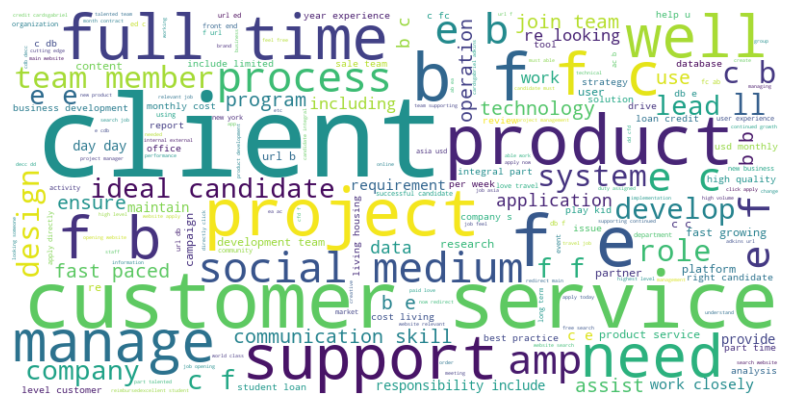

In [9]:
#Step 3 – WordCloud Visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df['clean_description'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


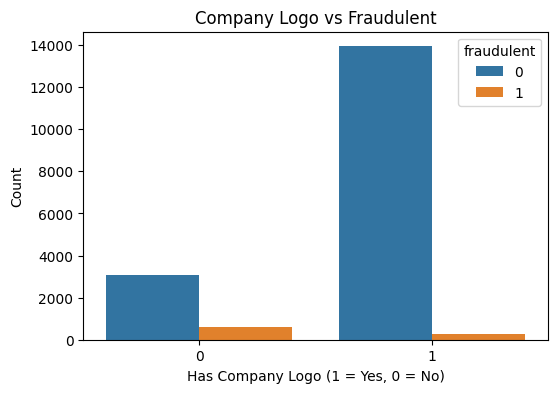

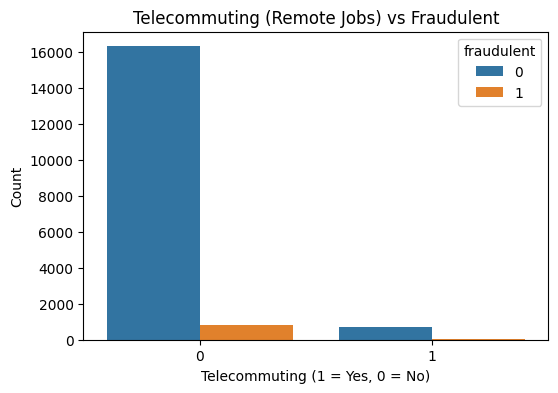

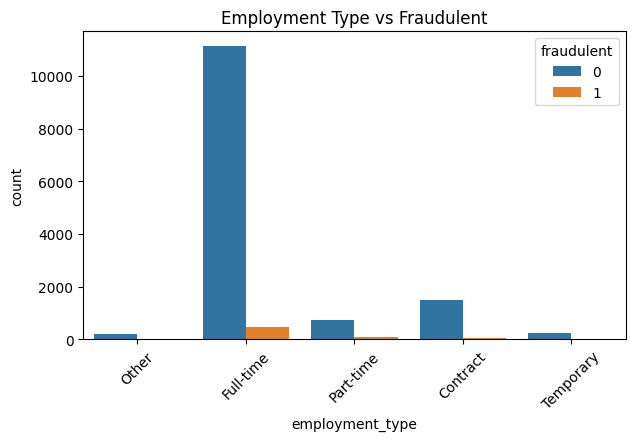


📊 Proportion of company logos by fraud status:
fraudulent  has_company_logo
0           1                   0.819149
            0                   0.180851
1           0                   0.673210
            1                   0.326790
Name: proportion, dtype: float64


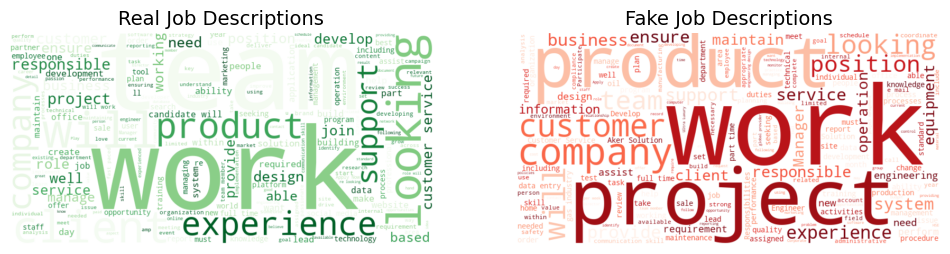

In [ ]:
# Task 3 – Feature Correlation and Text Insights

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# 1 Load cleaned dataset
df  = pd.read_csv("D:/intership/Intership_code/fake_job_postings.csv")

# 2 Ensure we have the cleaned description column
df['clean_description'] = df['description'].fillna("")

# 3 Select relevant columns
cols = ['has_company_logo', 'telecommuting', 'employment_type', 
        'required_experience', 'fraudulent']
subset = df[cols]

# 4 Bar chart: presence of company logo vs fraudulent
plt.figure(figsize=(6,4))
sns.countplot(data=subset, x='has_company_logo', hue='fraudulent')
plt.title("Company Logo vs Fraudulent")
plt.xlabel("Has Company Logo (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

# 5 Bar chart: telecommuting vs fraudulent
plt.figure(figsize=(6,4))
sns.countplot(data=subset, x='telecommuting', hue='fraudulent')
plt.title("Telecommuting (Remote Jobs) vs Fraudulent")
plt.xlabel("Telecommuting (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

# 6 Bar chart: employment type vs fraudulent
plt.figure(figsize=(7,4))
sns.countplot(data=subset, x='employment_type', hue='fraudulent')
plt.title("Employment Type vs Fraudulent")
plt.xticks(rotation=45)
plt.show()

# 7 Groupby to calculate proportions
print("\nProportion of company logos by fraud status:")
print(df.groupby('fraudulent')['has_company_logo'].value_counts(normalize=True))

# 8 Generate WordClouds for Real vs Fake Jobs
real_text = " ".join(df[df['fraudulent'] == 0]['clean_description'])
fake_text = " ".join(df[df['fraudulent'] == 1]['clean_description'])

real_wc = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(real_text)
fake_wc = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(fake_text)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(real_wc, interpolation='bilinear')
plt.title("Real Job Descriptions", fontsize=14)
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(fake_wc, interpolation='bilinear')
plt.title("Fake Job Descriptions", fontsize=14)
plt.axis("off")

plt.show()


In [ ]:
# Task 4 – Rule-Based Fake Job Detector
# 1 Define suspicious keywords
suspicious_words = [
    "urgent", "work from home", "limited vacancy", "visa", 
    "investment", "training fee", "money transfer", "hurry", 
    "quick money", "no experience", "click link"
]

# 2 Define a rule-based function
def rule_based_flag(text):
    text = str(text).lower()
    for word in suspicious_words:
        if word in text:
            return 1  # suspect
    return 0  # normal

# 3 Apply to all descriptions
df['suspect_flag'] = df['clean_description'].apply(rule_based_flag)

# 4 Compare with actual fraudulent column
print("\n Crosstab Comparison:")
print(pd.crosstab(df['suspect_flag'], df['fraudulent'], normalize='all'))

# 5 Print examples
suspect_but_real = df[(df['suspect_flag'] == 1) & (df['fraudulent'] == 0)]
print("\n Example of suspect but real jobs:")
print(suspect_but_real[['title', 'clean_description']].head(5))



🔍 Crosstab Comparison:
fraudulent           0         1
suspect_flag                    
0             0.895582  0.040101
1             0.055984  0.008333

📄 Example of suspect but real jobs:
                                                title  \
9             Customer Service Associate - Part Time    
10  ASP.net Developer Job opportunity at United St...   
11      Talent Sourcer (6 months fixed-term contract)   
25                          H1B SPONSOR FOR L1/L2/OPT   
29                        Customer Service Associate    

                                    clean_description  
9   The Customer Service Associate will be based i...  
10  Position : #URL_86fd830a95a64e2b30ceed829e63fd...  
11  TransferWise is the clever new way to move mon...  
25  Hello,Wish you are doing good...              ...  
29  The Customer Service Associate will be based i...  


In [2]:
# Day 5: Logistic Regression Model for Fake Job Detection
 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
 
# Load dataset (preprocessed with clean_description)
df  = pd.read_csv("D:/intership/Intership_code/fake_job_postings.csv")
df = df.dropna(subset=['description'])

 
# 1 Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['description'])
y = df['fraudulent']
 
# 2 Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
 
# 3 Train Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
 
# 4 Make predictions
y_pred = model.predict(X_test)
 
# 5 Evaluate performance
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
 
# 6 Check example predictions
test_samples = [
    "Work from home! Limited vacancies. Apply now.",
    "We are hiring a data scientist for our Bangalore office."
]
sample_features = vectorizer.transform(test_samples)
print("\nSample Predictions:", model.predict(sample_features))


Accuracy: 0.9656040268456376

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3403
           1       0.98      0.29      0.45       173

    accuracy                           0.97      3576
   macro avg       0.97      0.65      0.72      3576
weighted avg       0.97      0.97      0.96      3576


Confusion Matrix:
 [[3402    1]
 [ 122   51]]

Sample Predictions: [0 0]


In [4]:
import joblib
import numpy as np

# 1 Predict probabilities (confidence) for random samples
probs = model.predict_proba(X_test[:5])
print("\nProbability of being fake (1):\n", probs[:,1])

# 2 Show the first 5 job descriptions with their prediction
for i in range(5):
    print("\nDescription:", df['description'].iloc[i][:150], "...")
    print("Predicted Label:", "Fake" if y_pred[i] == 1 else "Real")
    print("Probability (Fake):", round(probs[i,1], 2))

# 3 Save model and vectorizer for reuse
joblib.dump(model, 'fake_job_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

print("\n Model and vectorizer saved successfully!")



Probability of being fake (1):
 [0.04911179 0.01735552 0.01660286 0.01666341 0.03962065]

Description: Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and curated recipe hub, is currently interviewing full- and  ...
Predicted Label: Real
Probability (Fake): 0.05

Description: Organised - Focused - Vibrant - Awesome!Do you have a passion for customer service? Slick typing skills? Maybe Account Management? ...And think admini ...
Predicted Label: Real
Probability (Fake): 0.02

Description: Our client, located in Houston, is actively seeking an experienced Commissioning Machinery Assistant that possesses strong supervisory skills and has  ...
Predicted Label: Real
Probability (Fake): 0.02

Description: THE COMPANY: ESRI – Environmental Systems Research InstituteOur passion for improving quality of life through geography is at the heart of everything  ...
Predicted Label: Real
Probability (Fake): 0.02

Description: JOB TITLE: Itemization Review Ma